## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x_points= np.linspace(0,20,40)
y_points= np.linspace(1,-39,40)
print(x_points)
print(y_points)

[ 0.          0.51282051  1.02564103  1.53846154  2.05128205  2.56410256
  3.07692308  3.58974359  4.1025641   4.61538462  5.12820513  5.64102564
  6.15384615  6.66666667  7.17948718  7.69230769  8.20512821  8.71794872
  9.23076923  9.74358974 10.25641026 10.76923077 11.28205128 11.79487179
 12.30769231 12.82051282 13.33333333 13.84615385 14.35897436 14.87179487
 15.38461538 15.8974359  16.41025641 16.92307692 17.43589744 17.94871795
 18.46153846 18.97435897 19.48717949 20.        ]
[ 1.00000000e+00 -2.56410256e-02 -1.05128205e+00 -2.07692308e+00
 -3.10256410e+00 -4.12820513e+00 -5.15384615e+00 -6.17948718e+00
 -7.20512821e+00 -8.23076923e+00 -9.25641026e+00 -1.02820513e+01
 -1.13076923e+01 -1.23333333e+01 -1.33589744e+01 -1.43846154e+01
 -1.54102564e+01 -1.64358974e+01 -1.74615385e+01 -1.84871795e+01
 -1.95128205e+01 -2.05384615e+01 -2.15641026e+01 -2.25897436e+01
 -2.36153846e+01 -2.46410256e+01 -2.56666667e+01 -2.66923077e+01
 -2.77179487e+01 -2.87435897e+01 -2.97692308e+01 -3.07948

#### Plot your data points. 

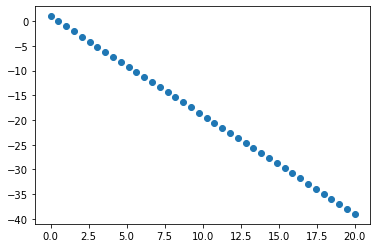

In [3]:
plt.scatter(x_points,y_points)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

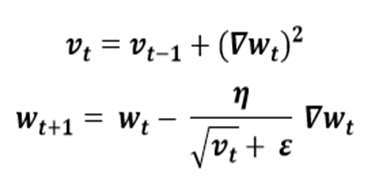

In [4]:
def GD_Batch_Adagrad(x_points,y_points,alpha,e,max_iterations):
    x_points= np.array(x_points)
    y_points= np.array(y_points)
    theta_0=np.array([0])
    theta_1=np.array([0])
    theta_0s= [theta_0]
    theta_1s= [theta_1]
    MSEs=[10]
    Hs=[]
    j=1000
    iterations = 0
    v0=0
    v1=0

    while (j>= 0.001)and (iterations <max_iterations) :
        iterations+=1
        y_predicted= theta_0+theta_1*x_points
        Hs.append(y_predicted)
        j_theta_0=  (np.subtract(y_predicted,y_points)).mean()
        j_theta_1=  (x_points*(np.subtract(y_predicted,y_points))).mean()
        v0= v0 + (j_theta_0)**2
        v1= v1 + (j_theta_1)**2
        theta_0 = theta_0 - ((alpha/(np.sqrt(v0)+e))*j_theta_0)
        #print(j_theta_0)
        theta_0s.append(theta_0)
        theta_1 = theta_1 - ((alpha/(np.sqrt(v1)+e))*j_theta_1)
        theta_1s.append(theta_1)
        #print(j_theta_1)
        j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
        MSE = 0.5*np.square(np.subtract(y_predicted,y_points)).mean()
        MSEs.append(MSE)
        if abs(MSEs[-2]-MSEs[-1])< 0.000001:
            break
    print("Optimal Theta_0 = " ,theta_0)
    print("Optimal Theta_1 = " ,theta_1)
    print("Number of epochs = ", iterations)
    print("R2_score = ",r2_score(y_points, y_predicted))
    return (theta_0,theta_1,theta_0s,theta_1s,Hs, MSEs)

In [31]:
Res1=GD_Batch_Adagrad(x_points,y_points,0.1,1E-6,10000)

Optimal Theta_0 =  [0.76369688]
Optimal Theta_1 =  [-1.98205954]
Number of epochs =  10000
R2_score =  0.9998963873649604


In [32]:
Res2=GD_Batch_Adagrad(x_points,y_points,0.3,1E-6,2000)

Optimal Theta_0 =  [0.9197829]
Optimal Theta_1 =  [-1.99391015]
Number of epochs =  2000
R2_score =  0.999988023392009


In [33]:
Res3=GD_Batch_Adagrad(x_points,y_points,0.5,1E-6,2000)

Optimal Theta_0 =  [0.9696871]
Optimal Theta_1 =  [-1.99769889]
Number of epochs =  1103
R2_score =  0.9999982817945445


In [34]:
Res=GD_Batch_Adagrad(x_points,y_points,0.95,1E-6,2000)

Optimal Theta_0 =  [0.98136758]
Optimal Theta_1 =  [-1.9985858]
Number of epochs =  475
R2_score =  0.9999993423978333


In [35]:
print(Res)

(array([0.98136758]), array([-1.9985858]), [array([0]), array([-0.94999995]), array([-1.33984638]), array([-1.52403651]), array([-1.60756339]), array([-1.63856346]), array([-1.64177194]), array([-1.6302878]), array([-1.61109865]), array([-1.5879368]), array([-1.56279522]), array([-1.53673717]), array([-1.51032909]), array([-1.48387193]), array([-1.45752483]), array([-1.43137118]), array([-1.40545391]), array([-1.37979437]), array([-1.35440239]), array([-1.32928169]), array([-1.30443271]), array([-1.2798542]), array([-1.25554401]), array([-1.23149951]), array([-1.20771787]), array([-1.18419615]), array([-1.16093138]), array([-1.1379206]), array([-1.11516085]), array([-1.09264922]), array([-1.07038281]), array([-1.04835879]), array([-1.02657434]), array([-1.00502668]), array([-0.98371308]), array([-0.96263084]), array([-0.94177729]), array([-0.92114981]), array([-0.9007458]), array([-0.88056271]), array([-0.86059799]), array([-0.84084917]), array([-0.82131379]), array([-0.80198941]), arr

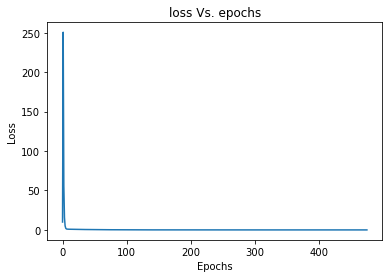

In [37]:
plt.plot(Res[-1])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss Vs. epochs")
plt.show()

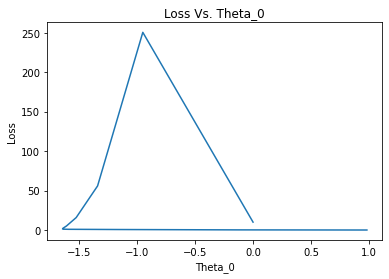

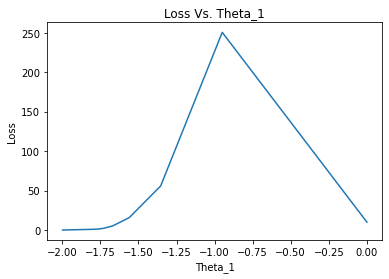

In [38]:
plt.plot(Res[2],Res[-1])
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_0")
plt.show()
plt.plot(Res[3],Res[-1])
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_1")
plt.show()

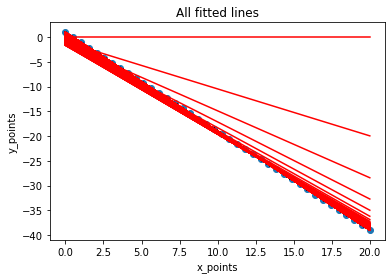

In [41]:
# All fitted lines per epoch (single graph)
plt.scatter(x_points,y_points)
for h in Res[4]:
    plt.plot(x_points,h,color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("All fitted lines")
plt.show()

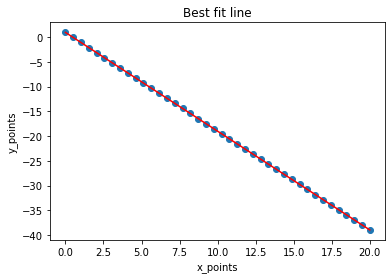

In [42]:
plt.scatter(x_points,y_points)
plt.plot(x_points,Res[4][-1],color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Best fit line")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

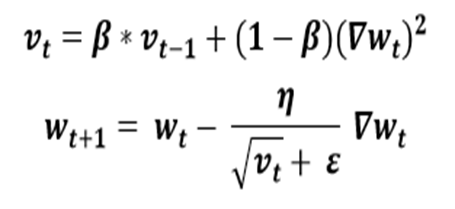

In [44]:
def GD_Batch_RMSprop(x_points,y_points,alpha,b,e,max_iterations):
    x_points= np.array(x_points)
    y_points= np.array(y_points)
    theta_0=np.array([0])
    theta_1=np.array([0])
    theta_0s= [theta_0]
    theta_1s= [theta_1]
    MSEs=[10]
    Hs=[]
    j=1000
    iterations = 0
    v0=0
    v1=0

    while (j>= 0.001)and (iterations <max_iterations) :
        iterations+=1
        y_predicted= theta_0+theta_1*x_points
        Hs.append(y_predicted)
        j_theta_0=  (np.subtract(y_predicted,y_points)).mean()
        j_theta_1=  (x_points*(np.subtract(y_predicted,y_points))).mean()
        v0= b*v0 + (1-b)*(j_theta_0)**2
        v1=  b*v1 + (1-b)*(j_theta_1)**2
        theta_0 = theta_0 - ((alpha/(np.sqrt(v0)+e))*j_theta_0)
        #print(j_theta_0)
        theta_0s.append(theta_0)
        theta_1 = theta_1 - ((alpha/(np.sqrt(v1)+e))*j_theta_1)
        theta_1s.append(theta_1)
        #print(j_theta_1)
        j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
        MSE = 0.5*np.square(np.subtract(y_predicted,y_points)).mean()
        MSEs.append(MSE)
        if abs(MSEs[-2]-MSEs[-1])< 0.000001:
            break
    print("Optimal Theta_0 = " ,theta_0)
    print("Optimal Theta_1 = " ,theta_1)
    print("Number of epochs = ", iterations)
    print("R2_score = ",r2_score(y_points, y_predicted))
    return (theta_0,theta_1,theta_0s,theta_1s,Hs, MSEs)

In [47]:
Res=GD_Batch_RMSprop(x_points,y_points,0.1,0.999,1E-6,500)

Optimal Theta_0 =  [0.98988943]
Optimal Theta_1 =  [-1.99923315]
Number of epochs =  178
R2_score =  0.9999997974399214


In [48]:
Res1=GD_Batch_RMSprop(x_points,y_points,0.1,0.1,1E-6,500)

Optimal Theta_0 =  [0.76895973]
Optimal Theta_1 =  [-2.03625763]
Number of epochs =  275
R2_score =  0.9971554500550277


In [49]:
Res2=GD_Batch_RMSprop(x_points,y_points,0.5,0.999,1E-6,500)

Optimal Theta_0 =  [0.98879335]
Optimal Theta_1 =  [-1.99915016]
Number of epochs =  214
R2_score =  0.9999997539928319


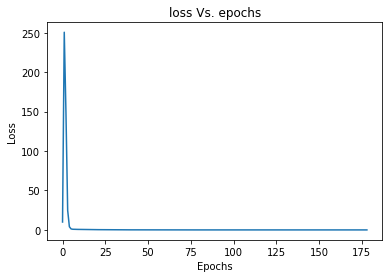

In [50]:
plt.plot(Res[-1])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss Vs. epochs")
plt.show()

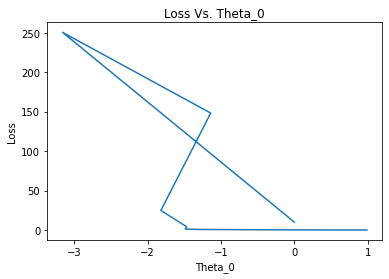

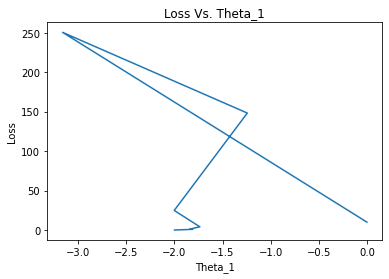

In [51]:
plt.plot(Res[2],Res[-1])
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_0")
plt.show()
plt.plot(Res[3],Res[-1])
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_1")
plt.show()

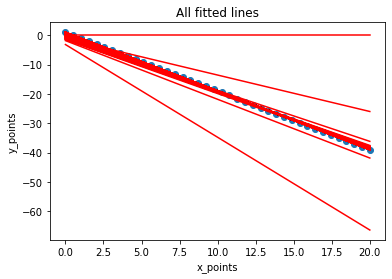

In [52]:
# All fitted lines per epoch (single graph)
plt.scatter(x_points,y_points)
for h in Res[4]:
    plt.plot(x_points,h,color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("All fitted lines")
plt.show()

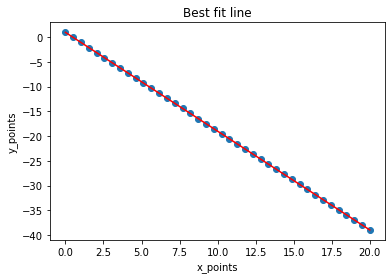

In [53]:
plt.scatter(x_points,y_points)
plt.plot(x_points,Res[4][-1],color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Best fit line")
plt.show()

In [ ]:
# Comment:
#RMSProp converges faster(less epoches) than Adagrad due to implementing the accumilated moving average (solves the vanishing gradient problem)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

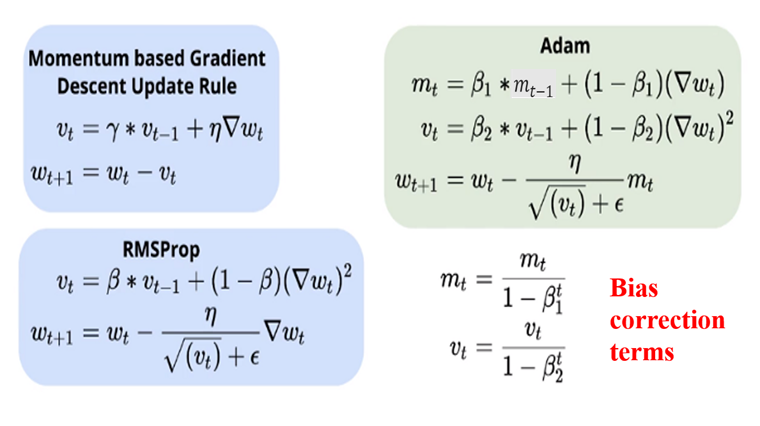

In [134]:
def GD_Batch_Adam(x_points,y_points,alpha,beta,b,e,max_iterations):
    x_points= np.array(x_points)
    y_points= np.array(y_points)
    theta_0=np.array([0])
    theta_1=np.array([0])
    theta_0s= [theta_0]
    theta_1s= [theta_1]
    MSEs=[10]
    Hs=[]
    j=1000
    iterations = 0
    v0=0
    v1=0

    while (j>= 0.001)and (iterations <max_iterations) :
        iterations+=1
        y_predicted= theta_0+theta_1*x_points
        Hs.append(y_predicted)
        j_theta_0=  (np.subtract(y_predicted,y_points)).mean()
        j_theta_1=  (x_points*(np.subtract(y_predicted,y_points))).mean()
        v0= b*v0 + (1-b)*(j_theta_0)**2
        v1=  b*v1 + (1-b)*(j_theta_1)**2
        m0= beta*v0 + (1-beta)*j_theta_0
        m1= beta*v1 + (1-beta)*j_theta_1
        m0= m0/(1-(beta**iterations))
        m1= m1/(1-(beta**iterations))
        v0= v0/(1-(b**iterations))
        v1= v1/(1-(b**iterations))
        theta_0 = theta_0 - ((alpha/(np.sqrt(v0)+e))*m0)
        #print(j_theta_0)
        theta_0s.append(theta_0)
        theta_1 = theta_1 - ((alpha/(np.sqrt(v1)+e))*m1)
        theta_1s.append(theta_1)
        #print(j_theta_1)
        j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
        MSE = 0.5*np.square(np.subtract(y_predicted,y_points)).mean()
        MSEs.append(MSE)
        if abs(MSEs[-2]-MSEs[-1])< 0.000001:
            break
    print("Optimal Theta_0 = " ,theta_0)
    print("Optimal Theta_1 = " ,theta_1)
    print("Number of epochs = ", iterations)
    print("R2_score = ",r2_score(y_points, y_predicted))
    return (theta_0,theta_1,theta_0s,theta_1s,Hs, MSEs)

In [135]:
Res=GD_Batch_Adam(x_points,y_points,0.001,0.3,0.5,1E-6,5000)

Optimal Theta_0 =  [0.9873728]
Optimal Theta_1 =  [-1.99868687]
Number of epochs =  1894
R2_score =  0.9999995420220744


In [136]:
Res1=GD_Batch_Adam(x_points,y_points,0.05,0.03,0.5,1E-6,5000)

Optimal Theta_0 =  [1.12188043]
Optimal Theta_1 =  [-2.03862919]
Number of epochs =  5000
R2_score =  0.9995056023143362


In [137]:
Res2=GD_Batch_Adam(x_points,y_points,0.01,0.3,0.1,1E-6,5000)

Optimal Theta_0 =  [0.41250795]
Optimal Theta_1 =  [-1.95535856]
Number of epochs =  99
R2_score =  0.999325048586408


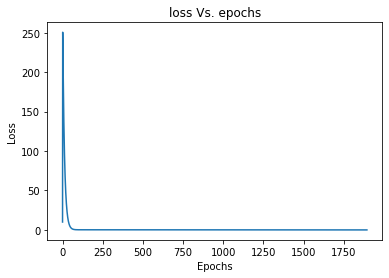

In [101]:
plt.plot(Res[-1])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss Vs. epochs")
plt.show()

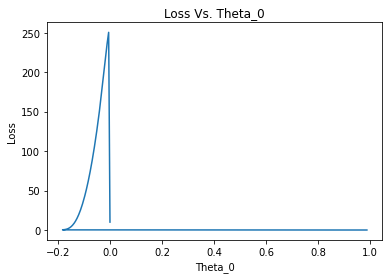

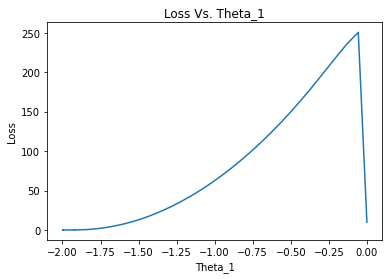

In [102]:
plt.plot(Res[2],Res[-1])
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_0")
plt.show()
plt.plot(Res[3],Res[-1])
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.title("Loss Vs. Theta_1")
plt.show()

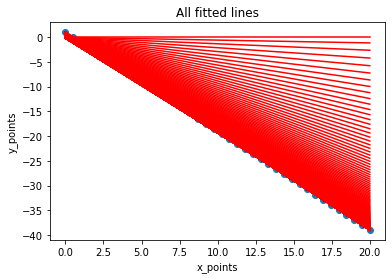

In [105]:
# All fitted lines per epoch (single graph)
plt.scatter(x_points,y_points)
for h in Res[4]:
    plt.plot(x_points,h,color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("All fitted lines")
plt.show()

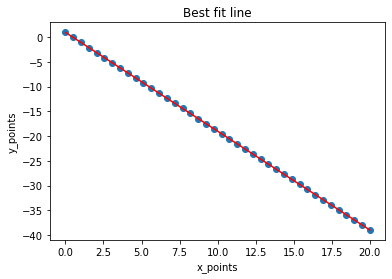

In [106]:
plt.scatter(x_points,y_points)
plt.plot(x_points,Res[4][-1],color="red")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Best fit line")
plt.show()

In [177]:
                                            #Comparison :
        # parameters: learning rate= 0.1, Beta2=0.05, Epsilon= 1E-6 , Max number of Iterations= 10000
    
print("Reuslts of Adagrad: ")
Res_adg=GD_Batch_Adagrad(x_points,y_points,0.1,1E-6,10000)
print("                     ")
print("Reuslts of RMSprop: ")
Res_rms=GD_Batch_RMSprop(x_points,y_points,0.1,0.05,1E-6,10000)
print("                     ")
print("Reuslts of Adam: ")
Res_adam=GD_Batch_Adam(x_points,y_points,0.1,0.03,0.05,1E-6,10000)
    

Reuslts of Adagrad: 
Optimal Theta_0 =  [0.76369688]
Optimal Theta_1 =  [-1.98205954]
Number of epochs =  10000
R2_score =  0.9998963873649604
                     
Reuslts of RMSprop: 
Optimal Theta_0 =  [0.85831724]
Optimal Theta_1 =  [-2.04304496]
Number of epochs =  643
R2_score =  0.997201248487175
                     
Reuslts of Adam: 
Optimal Theta_0 =  [1.44683203]
Optimal Theta_1 =  [-2.11339791]
Number of epochs =  10000
R2_score =  0.9977377403784259


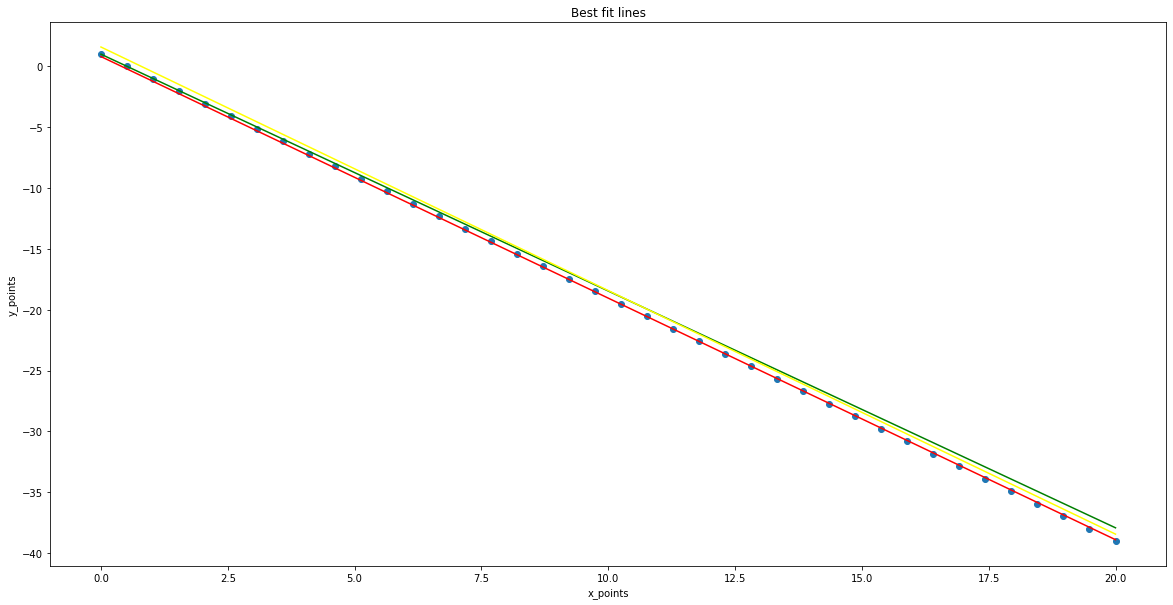

In [220]:
plt.scatter(x_points,y_points)
plt.plot(x_points,Res_adg[4][-1],color="red")
plt.plot(x_points,Res_rms[4][-1],color="green")
plt.plot(x_points,Res_adam[4][-1],color="yellow")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Best fit lines")
plt.rcParams["figure.figsize"] = (200,10)
plt.show()

## Congratulations 
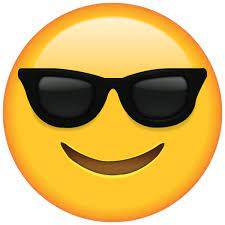